In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

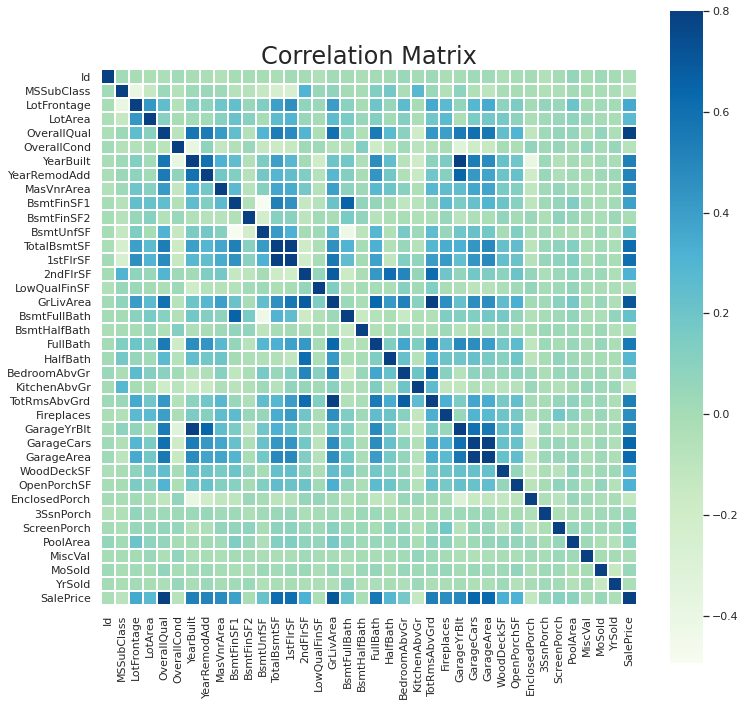

In [3]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(12,12))
plt.title('Correlation Matrix',fontsize=24)
sns.heatmap(train_data.corr(), linewidths=0.1, vmax=0.8, square=True, cmap="GnBu",
    linecolor='w', annot=False)
plt.show()

In [4]:
sale_price_corr = train_data.corr()['SalePrice'].sort_values(ascending=False)
important_keys = sale_price_corr[sale_price_corr > 0.5].keys()
important_keys = important_keys.drop(['1stFlrSF', 'GarageCars', 'OverallQual', 'TotRmsAbvGrd'])
print(important_keys)

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')


In [5]:
keys_to_remove = train_data.keys().difference(important_keys)
train_data = train_data.drop(labels=keys_to_remove, axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearBuilt     1460 non-null   int64
 1   YearRemodAdd  1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   GrLivArea     1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   GarageArea    1460 non-null   int64
 6   SalePrice     1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


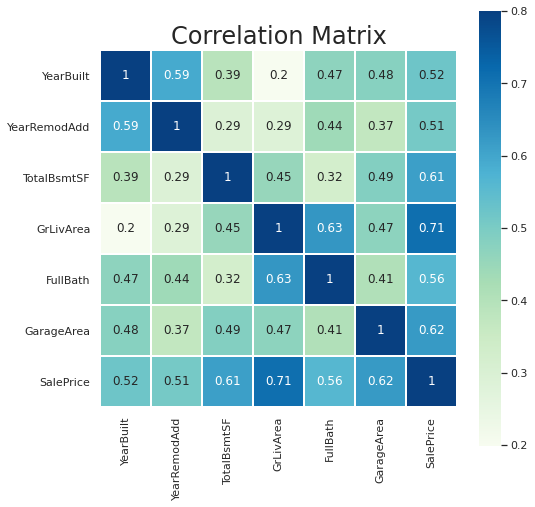

In [6]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(8,8))
plt.title('Correlation Matrix',fontsize=24)
sns.heatmap(train_data.corr(), linewidths=0.1, vmax=0.8, square=True, cmap="GnBu",
    linecolor='w', annot=True)
plt.show()

In [7]:
new_columns_names = {'YearRemodAdd': 'YearRenovated',
                     'TotalBsmtSF' : 'BasementArea',
                     'GrLivArea'   : 'LivingArea',
                     'FullBath'    : 'Bathrooms',
                     'SalePrice'   : 'Price'}
train_data = train_data.rename(columns=new_columns_names)

In [8]:
for key in ('BasementArea', 'LivingArea', 'GarageArea'):
    train_data[key] = train_data[key].apply(lambda x: round(x / 10.764, 2))

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearBuilt,1460.0,1971.267808,30.202904,1872.00,1954.0000,1973.000,2000.0000,2010.00
YearRenovated,1460.0,1984.865753,20.645407,1950.00,1967.0000,1994.000,2004.0000,2010.00
BasementArea,1460.0,98.237610,40.756735,0.00,73.9275,92.115,120.6125,567.63
LivingArea,1460.0,140.790007,48.818286,31.03,104.9325,136.010,165.0600,524.15
Bathrooms,1460.0,1.565068,0.550916,0.00,1.0000,2.000,2.0000,3.00
GarageArea,1460.0,43.940973,19.862824,0.00,31.0800,44.590,53.5100,131.74
Price,1460.0,180921.195890,79442.502883,34900.00,129975.0000,163000.000,214000.0000,755000.00


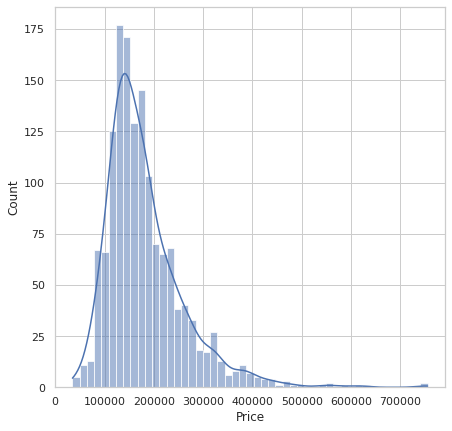

In [104]:
plt.figure(figsize=(7,7))
plt.title='Price distribuition'
plt.xlabel='Price [USD]'
plt.ylabel=''
sns.histplot(train_data['Price'], kde=True)
plt.show()

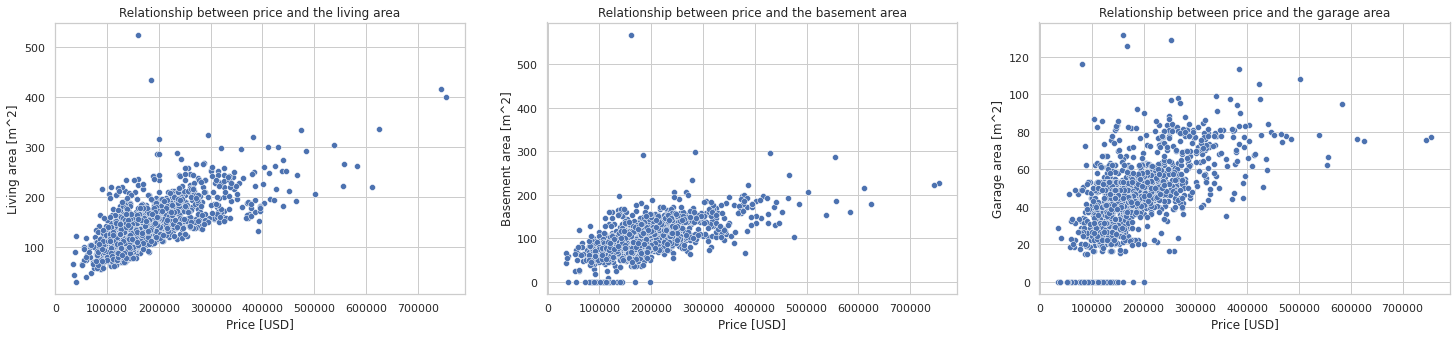

In [101]:
fig, ax = plt.subplots(1, 3, figsize=(25,5))
sns.scatterplot(x='Price',y='LivingArea'  , data=train_data, ax=ax[0])
sns.scatterplot(x='Price',y='BasementArea', data=train_data, ax=ax[1])
sns.scatterplot(x='Price',y='GarageArea'  , data=train_data, ax=ax[2])
ax[0].set(xlabel='Price [USD]', ylabel='Living area [m^2]', title='Relationship between price and the living area')
ax[1].set(xlabel='Price [USD]', ylabel='Basement area [m^2]', title='Relationship between price and the basement area')
ax[2].set(xlabel='Price [USD]', ylabel='Garage area [m^2]', title='Relationship between price and the garage area')
plt.show()

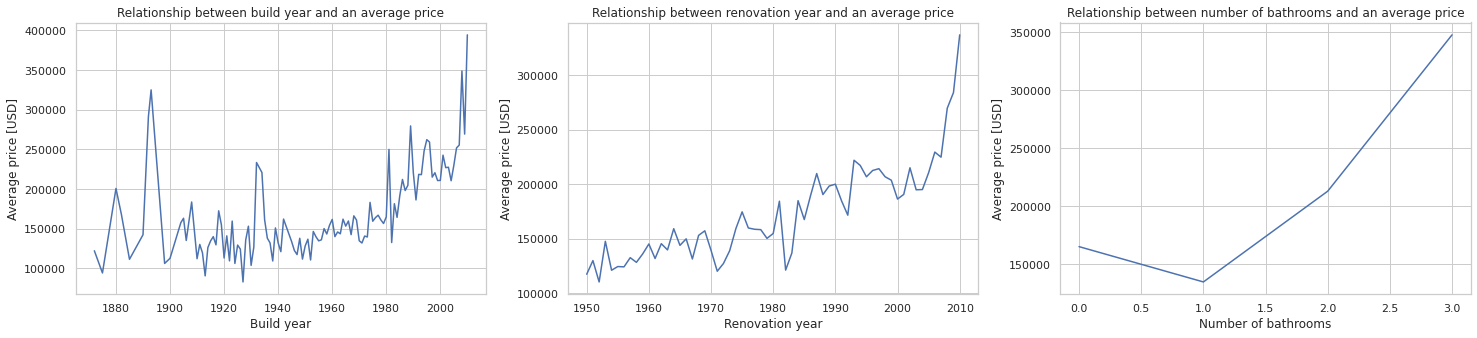

In [97]:
fig, ax = plt.subplots(1, 3, figsize=(25,5))
plt_data = train_data[['YearBuilt', 'Price']].groupby(train_data['YearBuilt']).mean()
ax[0].plot(plt_data['YearBuilt'], plt_data['Price'])
ax[0].set(xlabel='Build year', ylabel='Average price [USD]', title='Relationship between build year and an average price')
plt_data = train_data[['YearRenovated', 'Price']].groupby(train_data['YearRenovated']).mean()
ax[1].plot(plt_data['YearRenovated'], plt_data['Price'])
ax[1].set(xlabel='Renovation year', ylabel='Average price [USD]', title='Relationship between renovation year and an average price')
plt_data = train_data[['Bathrooms', 'Price']].groupby(train_data['Bathrooms']).mean()
ax[2].plot(plt_data['Bathrooms'], plt_data['Price'])
ax[2].set(xlabel='Number of bathrooms', ylabel='Average price [USD]', title='Relationship between number of bathrooms and an average price')
plt.show()